# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [56]:
(df.isnull().sum()/(len(df)))*100

num_passengers           0.0
sales_channel            0.0
trip_type                0.0
purchase_lead            0.0
length_of_stay           0.0
flight_hour              0.0
flight_day               0.0
route                    0.0
booking_origin           0.0
wants_extra_baggage      0.0
wants_preferred_seat     0.0
wants_in_flight_meals    0.0
flight_duration          0.0
booking_complete         0.0
dtype: float64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [58]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [59]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [60]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_passengers,50000.0,1.591240,1.020165,1.00,1.00,1.00,2.00,9.0
purchase_lead,50000.0,84.940480,90.451378,0.00,21.00,51.00,115.00,867.0
length_of_stay,50000.0,23.044560,33.887670,0.00,5.00,17.00,28.00,778.0
flight_hour,50000.0,9.066340,5.412660,0.00,5.00,9.00,13.00,23.0
flight_day,50000.0,3.814420,1.992792,1.00,2.00,4.00,5.00,7.0
wants_extra_baggage,50000.0,0.668780,0.470657,0.00,0.00,1.00,1.00,1.0
wants_preferred_seat,50000.0,0.296960,0.456923,0.00,0.00,0.00,1.00,1.0
wants_in_flight_meals,50000.0,0.427140,0.494668,0.00,0.00,0.00,1.00,1.0
flight_duration,50000.0,7.277561,1.496863,4.67,5.62,7.57,8.83,9.5
booking_complete,50000.0,0.149560,0.356643,0.00,0.00,0.00,0.00,1.0


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [62]:
df.describe(include=["bool", "object"]).T

,count,unique,top,freq
sales_channel,50000,2,Internet,44382
trip_type,50000,3,RoundTrip,49497
route,50000,799,AKLKUL,2680
booking_origin,50000,104,Australia,17872


In [63]:
df.sample(5)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
14134,1,Internet,RoundTrip,15,21,4,5,ICNPER,Australia,1,0,0,6.62,0
17985,1,Internet,RoundTrip,26,62,2,4,KTMTGG,Malaysia,1,0,0,4.75,0
25513,2,Internet,RoundTrip,368,20,15,7,SYDTRZ,India,1,1,1,8.58,0
41409,1,Internet,RoundTrip,94,5,15,1,PENPVG,China,0,0,0,5.33,0
4312,2,Internet,RoundTrip,197,22,9,4,CGKPVG,China,1,0,0,5.33,0


In [64]:
df.size

700000

In [65]:
df.shape

(50000, 14)

In [66]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [67]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [68]:
df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [69]:
df[df.duplicated()]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
196,5,Internet,RoundTrip,206,17,13,7,AKLKUL,Malaysia,1,0,0,8.83,0
316,5,Internet,RoundTrip,206,17,13,7,AKLKUL,Malaysia,1,0,0,8.83,0
384,5,Internet,RoundTrip,206,17,13,7,AKLKUL,Malaysia,1,0,0,8.83,0
456,1,Internet,RoundTrip,30,85,15,5,AKLKUL,Malaysia,1,0,0,8.83,1
513,3,Internet,RoundTrip,109,20,4,2,AKLKUL,Singapore,1,0,1,8.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49852,2,Internet,RoundTrip,204,6,14,2,PENTPE,Malaysia,1,0,0,4.67,0
49902,1,Mobile,RoundTrip,106,6,11,5,PENTPE,Taiwan,1,0,0,4.67,0
49934,1,Internet,RoundTrip,2,6,3,4,PENTPE,Malaysia,0,0,1,4.67,0
49944,1,Internet,RoundTrip,2,6,3,4,PENTPE,Malaysia,0,0,1,4.67,0


In [70]:
df = df.drop_duplicates()

In [71]:
df[df.duplicated()]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete


In [72]:
len(df)

49281

In [73]:
max_threshold = df["num_passengers"].quantile(0.95)

In [74]:
max_threshold_pur_lead = 180
max_threshold_len_of_s = 60


In [75]:
df = df[(df["num_passengers"]<max_threshold) & (df["purchase_lead"]<max_threshold_pur_lead) & (df["length_of_stay"]<max_threshold_len_of_s)]

In [76]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,4,AKLDEL,New Zealand,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,1,AKLDEL,New Zealand,0,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


# Univariate Analysis

In [77]:
# Separate the columns into categorical and numeric features..
# cat_cols = df.select_dtypes(include=['object']).columns
# num_cols = df.select_dtypes(include=np.number).columns.tolist()
# print("Categorical Variables:")
# print(cat_cols)
# print("Numerical Variables:")
# print(num_cols)

In [78]:
# separate numerical from categorical fields
cat_fields = [col for col in df.columns if df[col].dtype == "O"]  # capital 'O'
numerical_fields = [col for col in df.columns if df[col].dtype != "O"]

In [79]:
ct = [
    'flight_day',
    'wants_extra_baggage',
    'wants_preferred_seat',
    'wants_in_flight_meals',
    'booking_complete']
nums = [field for field in numerical_fields if field not in ct]
nums

['num_passengers',
 'purchase_lead',
 'length_of_stay',
 'flight_hour',
 'flight_duration']

In [80]:
cat_fields.extend(ct)

In [81]:
cat_fields

['sales_channel',
 'trip_type',
 'route',
 'booking_origin',
 'flight_day',
 'wants_extra_baggage',
 'wants_preferred_seat',
 'wants_in_flight_meals',
 'booking_complete']

num_passengers
Skew : 1.34


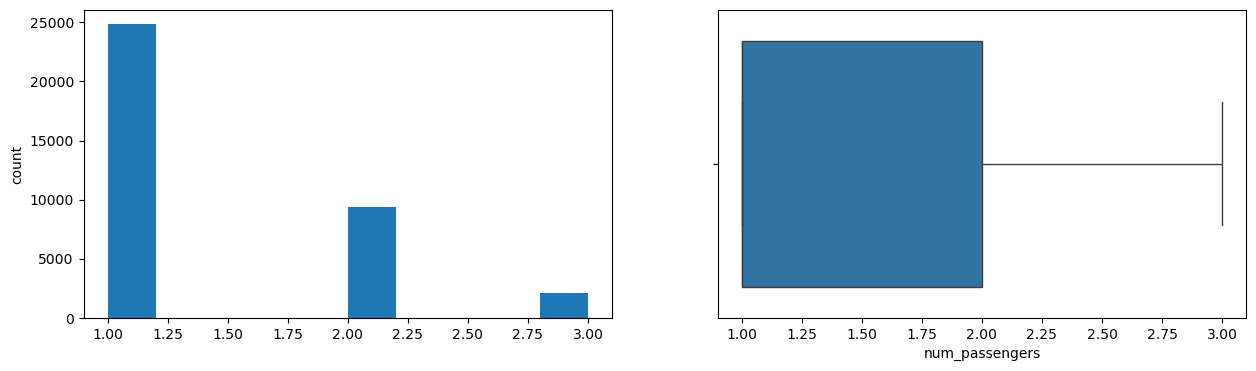

purchase_lead
Skew : 0.97


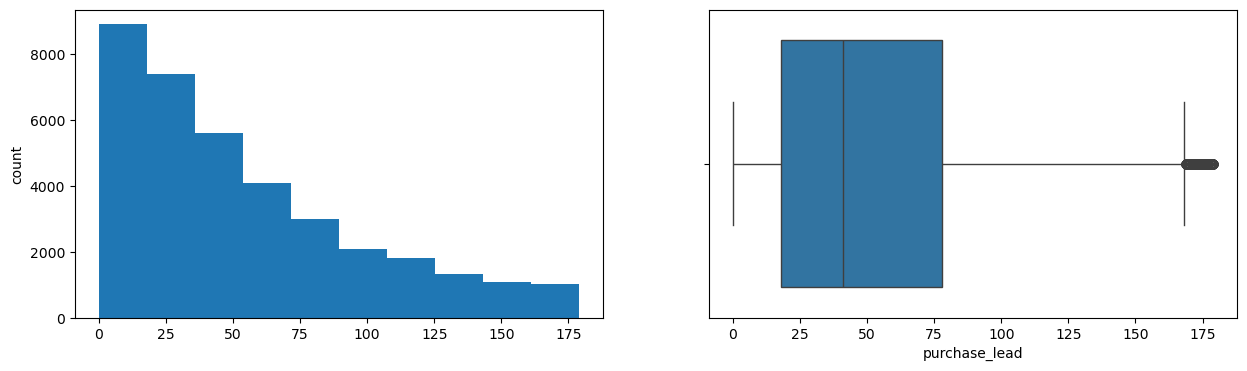

length_of_stay
Skew : 0.99


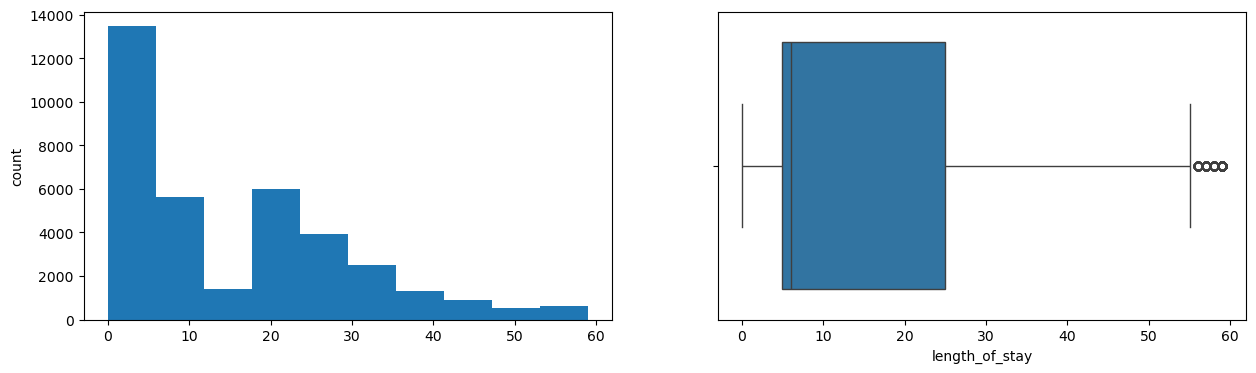

flight_hour
Skew : 0.39


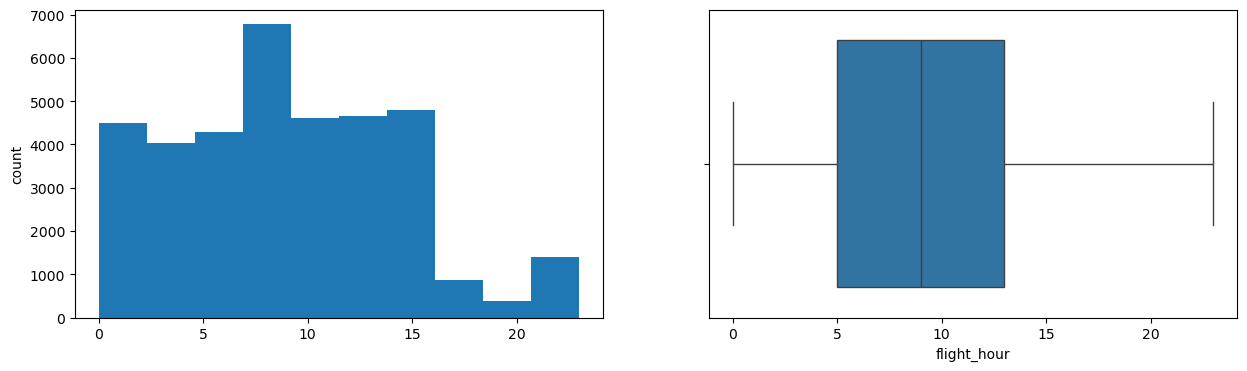

flight_duration
Skew : -0.31


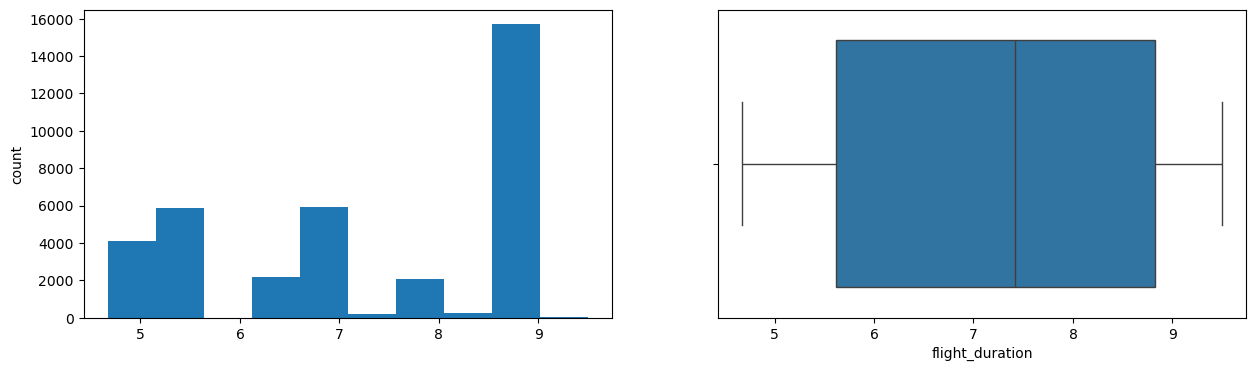

In [82]:
# viz for individual columns
for col in nums:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

- num_passengers, length of stay, purchase leads are highly skewed
- flight is moderately skewed
- 66.88% 0f passenger needed extra baggage
- 70.304% of passengers needed preferred seats
- 57.28% needed in-flight meal
- our target label is imbalanced 

In [83]:
len(cat_fields)

9

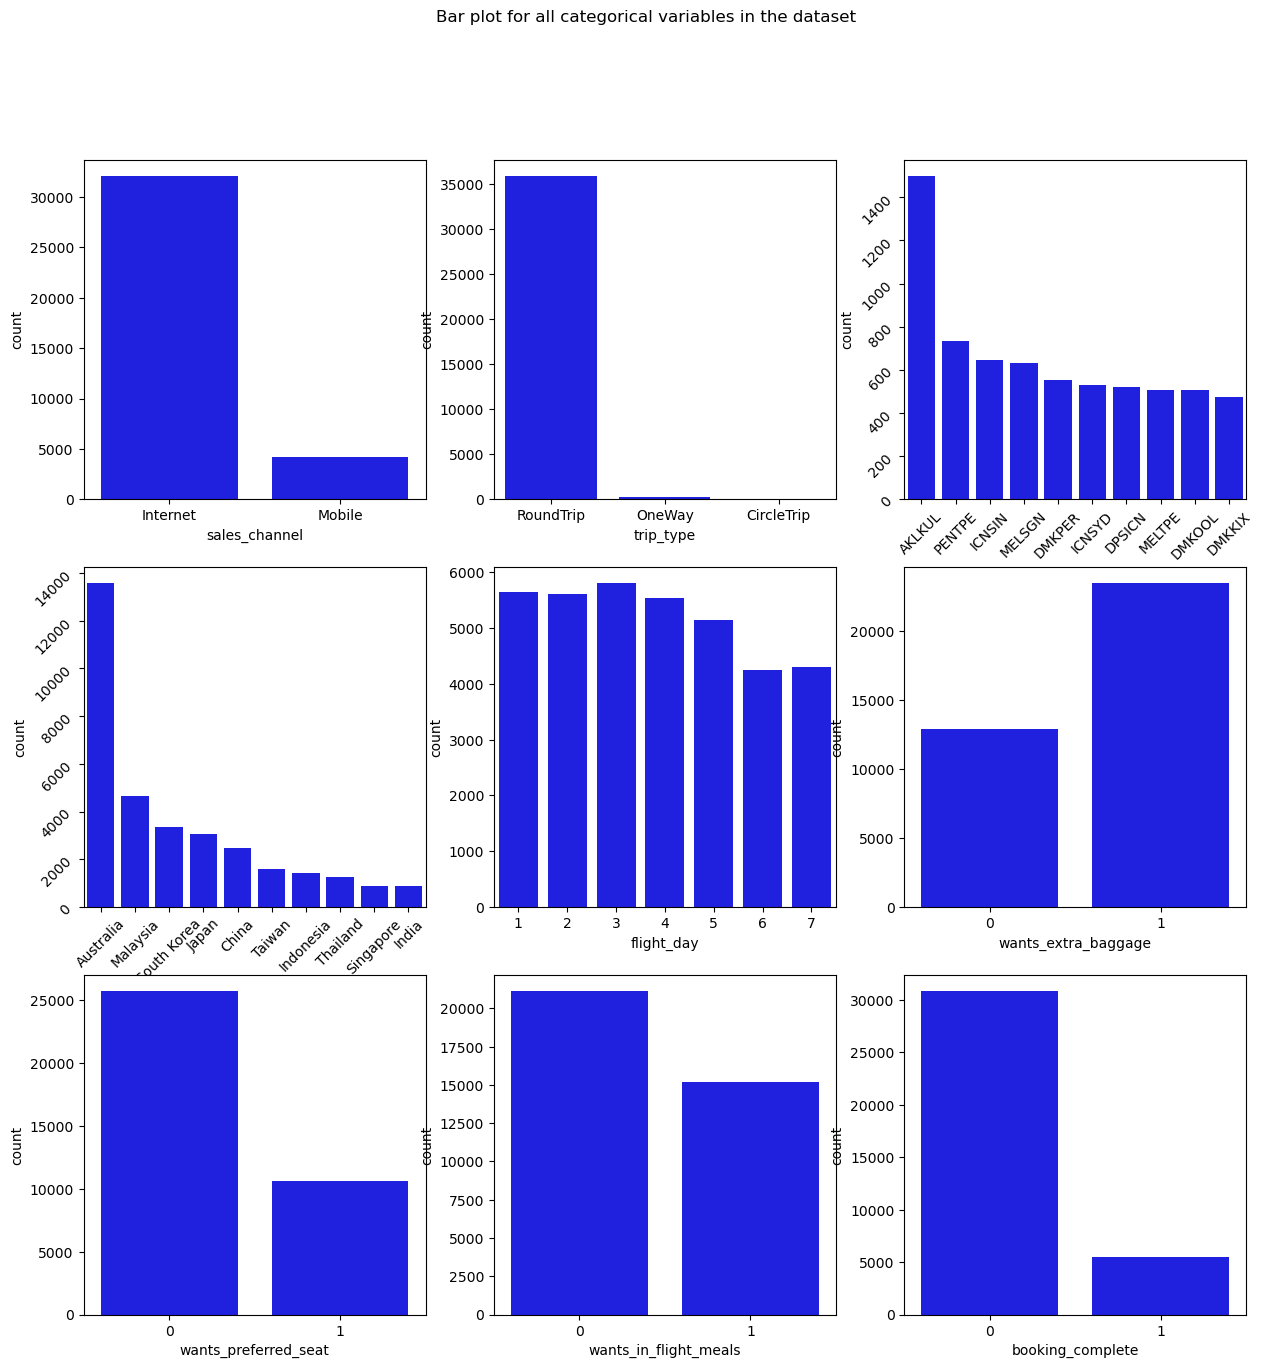

In [84]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax=axes[0, 0], x='sales_channel', data=df, color='blue',
              order=df['sales_channel'].value_counts().index)
sns.countplot(ax=axes[0, 1], x='trip_type', data=df, color='blue',
              order=df['trip_type'].value_counts().index)
sns.countplot(ax=axes[0, 2], x='route', data=df, color='blue',
              order=df['route'].value_counts().iloc[:10].index)
sns.countplot(ax=axes[1, 0], x='booking_origin', data=df, color='blue',
              order=df['booking_origin'].value_counts().iloc[:10].index)
sns.countplot(ax=axes[1, 1], x='flight_day', data=df, color='blue')
sns.countplot(ax=axes[1, 2], x='wants_extra_baggage', data=df, color='blue')
sns.countplot(ax=axes[2, 0], x='wants_preferred_seat', data=df, color='blue')
sns.countplot(ax=axes[2, 1], x='wants_in_flight_meals', data=df, color='blue')
sns.countplot(ax=axes[2, 2], x='booking_complete', data=df, color='blue')

axes[1][0].tick_params(labelrotation=45)
axes[0][2].tick_params(labelrotation=45)

- 88.76% of  passengers prefer making payment via the internet, 
- RoundTrip were the most commonly use trip type
- Austalia is the travel origin with the highest frequency
- AkLKul is the route with the highest frequency

In [85]:
# # Function for log transformation of the column
# def log_transform(data, col):
#     for colname in col:
#         if (data[colname] == 1.0).all():
#             data[colname + '_log'] = np.log(data[colname]+1)
#         else:
#             data[colname + '_log'] = np.log(data[colname])
#     data.info()

In [86]:
#log_transform(df, ['num_passengers', 'purchase_lead', "flight_hour"])

In [87]:
# Log transformation of the feature 'Kilometers_Driven'
#sns.displot(df["flight_hour_log"])

In [88]:
(df["wants_extra_baggage"].value_counts()/len(df))*100

wants_extra_baggage
1    64.514974
0    35.485026
Name: count, dtype: float64

66.88% of the passengers needed extra baggage

In [89]:
(df["wants_preferred_seat"].value_counts()/len(df))*100

wants_preferred_seat
0    70.835055
1    29.164945
Name: count, dtype: float64

<Axes: ylabel='count'>

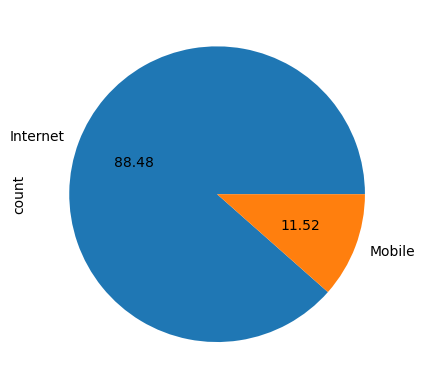

In [90]:
df.sales_channel.value_counts().plot(kind='pie', autopct='%.2f')

88.76% of our customers use the internet while 11.24 uses mobile phones 0r app.

# Bivariate Analysis

In [91]:
cat_fields

['sales_channel',
 'trip_type',
 'route',
 'booking_origin',
 'flight_day',
 'wants_extra_baggage',
 'wants_preferred_seat',
 'wants_in_flight_meals',
 'booking_complete']

fig, axarr = plt.subplots(4, 2, figsize=(12, 18))
df.groupby('p')['boo'].mean().sort_values(
    ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Location Vs Price", fontsize=18)
df.groupby('Transmission')['Price_log'].mean().sort_values(
    ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Transmission Vs Price", fontsize=18)
df.groupby('Fuel_Type')['Price_log'].mean().sort_values(
    ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Fuel_Type Vs Price", fontsize=18)
df.groupby('Owner_Type')['Price_log'].mean().sort_values(
    ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Owner_Type Vs Price", fontsize=18)
df.groupby('Brand')['Price_log'].mean().sort_values(
    ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Brand Vs Price", fontsize=18)
df.groupby('Model')['Price_log'].mean().sort_values(
    ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Model Vs Price", fontsize=18)
df.groupby('Seats')['Price_log'].mean().sort_values(
    ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("Seats Vs Price", fontsize=18)
df.groupby('Car_Age')['Price_log'].mean().sort_values(
    ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("Car_Age Vs Price", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

C:\Users\UK\AppData\Local\Temp\ipykernel_12628\2907459514.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(ax=axes[0, 0], x='sales_channel', hue="booking_complete", data=df, color='blue',
C:\Users\UK\AppData\Local\Temp\ipykernel_12628\2907459514.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(ax=axes[0, 1], x='trip_type', hue="booking_complete", data=df, color='blue',
C:\Users\UK\AppData\Local\Temp\ipykernel_12628\2907459514.py:7: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(ax=axes[0, 2], x='route', hue="booking_complete", data=df, color='blue',
C:\Users\UK\AppData\Local\Temp\ipykernel_12628\2907459514.py:9: FutureWarnin

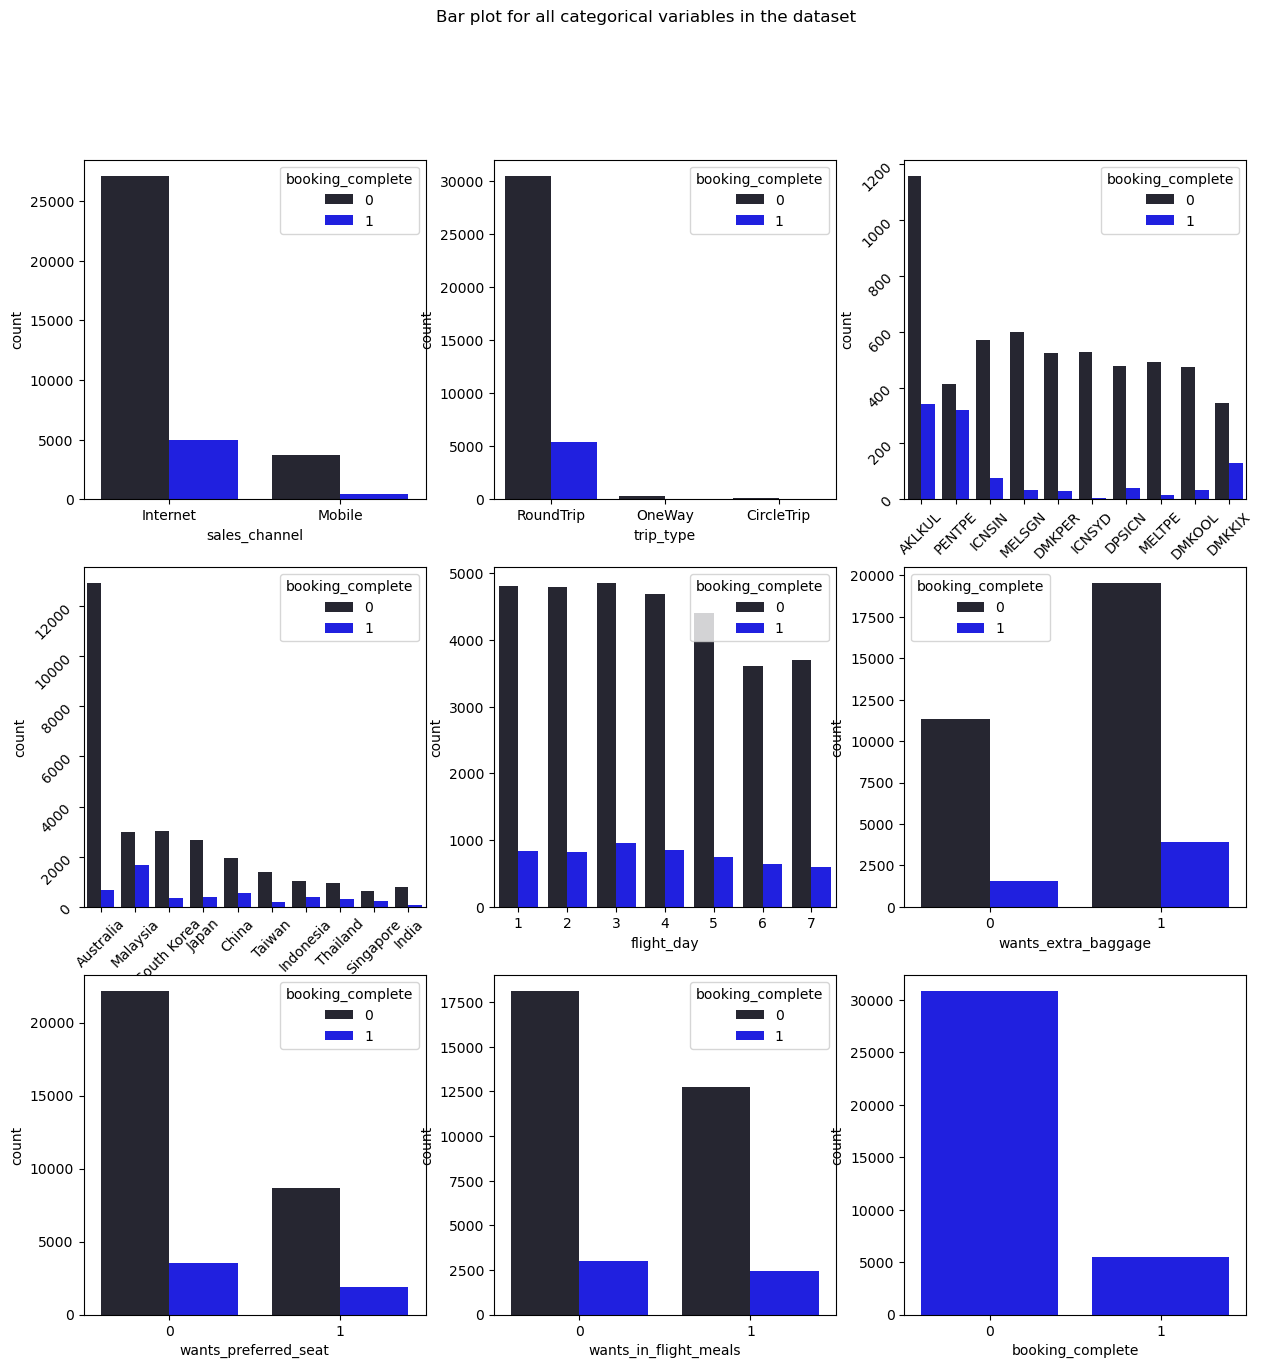

In [92]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax=axes[0, 0], x='sales_channel', hue="booking_complete", data=df, color='blue',
              order=df['sales_channel'].value_counts().index)
sns.countplot(ax=axes[0, 1], x='trip_type', hue="booking_complete", data=df, color='blue',
              order=df['trip_type'].value_counts().index)
sns.countplot(ax=axes[0, 2], x='route', hue="booking_complete", data=df, color='blue',
              order=df['route'].value_counts().iloc[:10].index)
sns.countplot(ax=axes[1, 0], x='booking_origin', hue="booking_complete", data=df, color='blue',
              order=df['booking_origin'].value_counts().iloc[:10].index)
sns.countplot(ax=axes[1, 1], x='flight_day',
              hue="booking_complete", data=df, color='blue')
sns.countplot(ax=axes[1, 2], x='wants_extra_baggage',
              hue="booking_complete", data=df, color='blue')
sns.countplot(ax=axes[2, 0], x='wants_preferred_seat',
              hue="booking_complete", data=df, color='blue')
sns.countplot(ax=axes[2, 1], x='wants_in_flight_meals',
              hue="booking_complete", data=df, color='blue')
sns.countplot(ax=axes[2, 2], x='booking_complete', data=df, color='blue')

axes[0][2].tick_params(labelrotation=45)
axes[1][0].tick_params(labelrotation=45)

<Figure size 1300x1700 with 0 Axes>

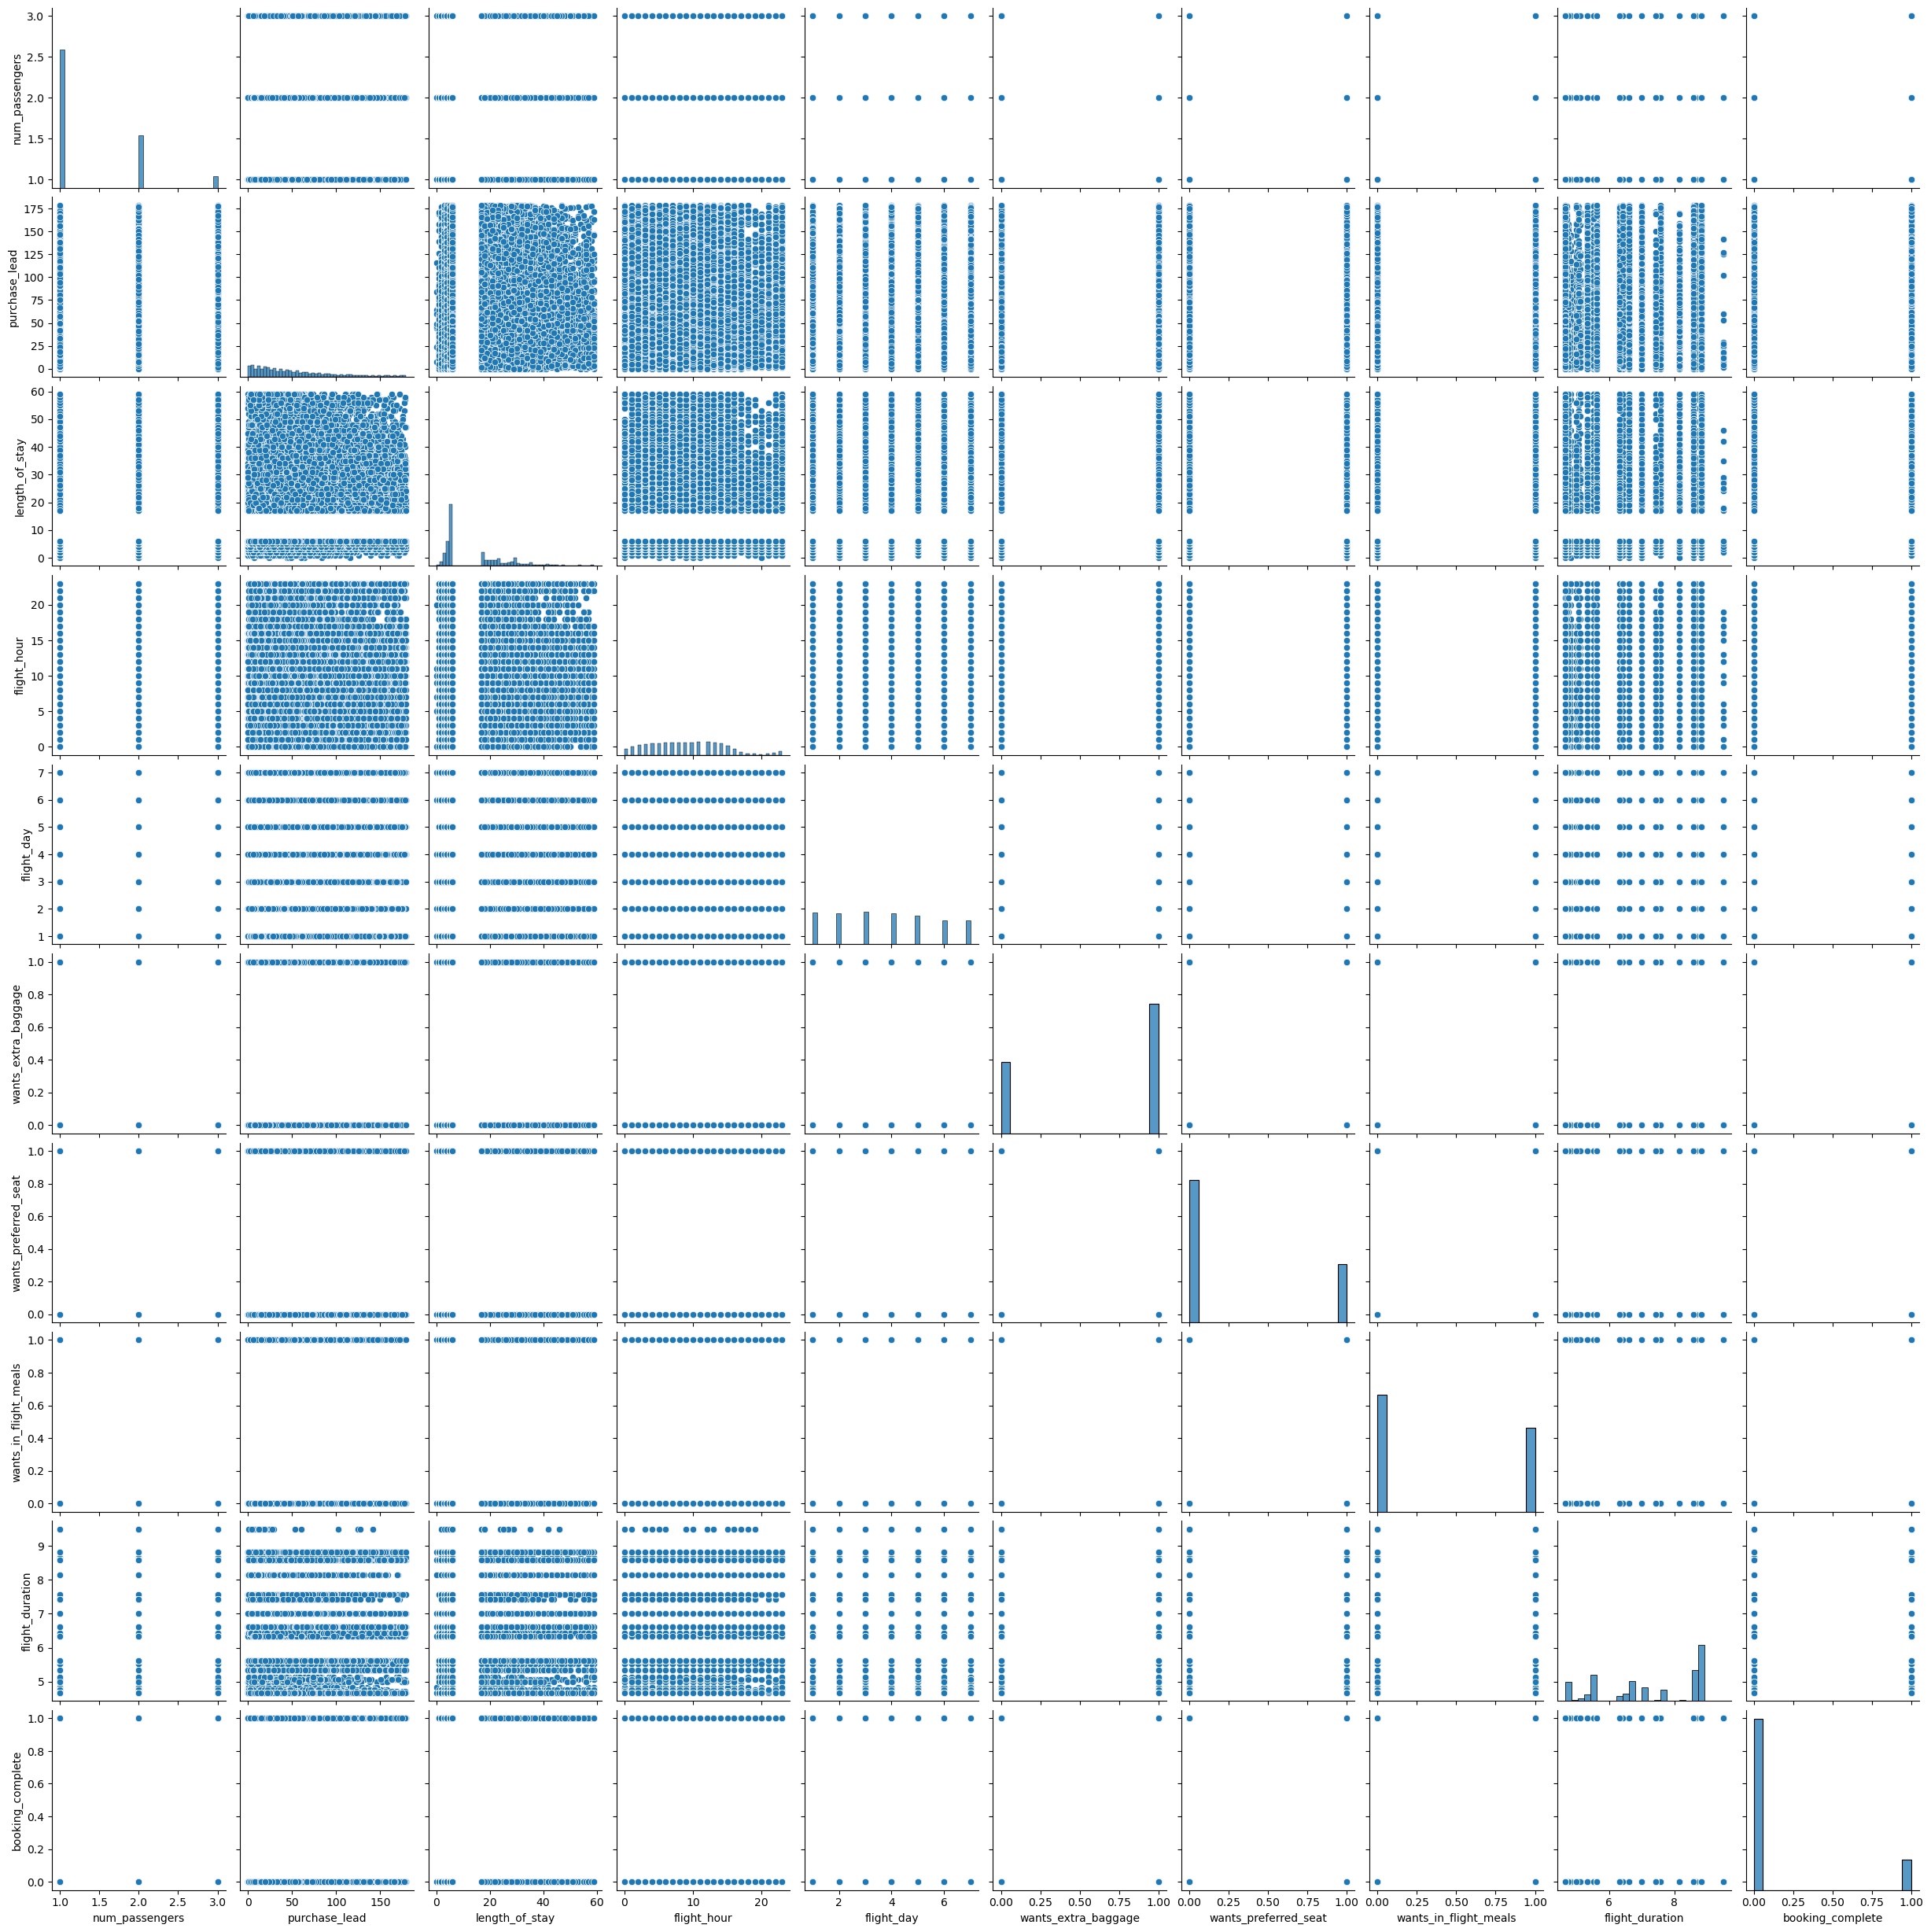

In [93]:
plt.figure(figsize=(13, 17))
sns.pairplot(data=df)
plt.show()

# Multivariate Analysis

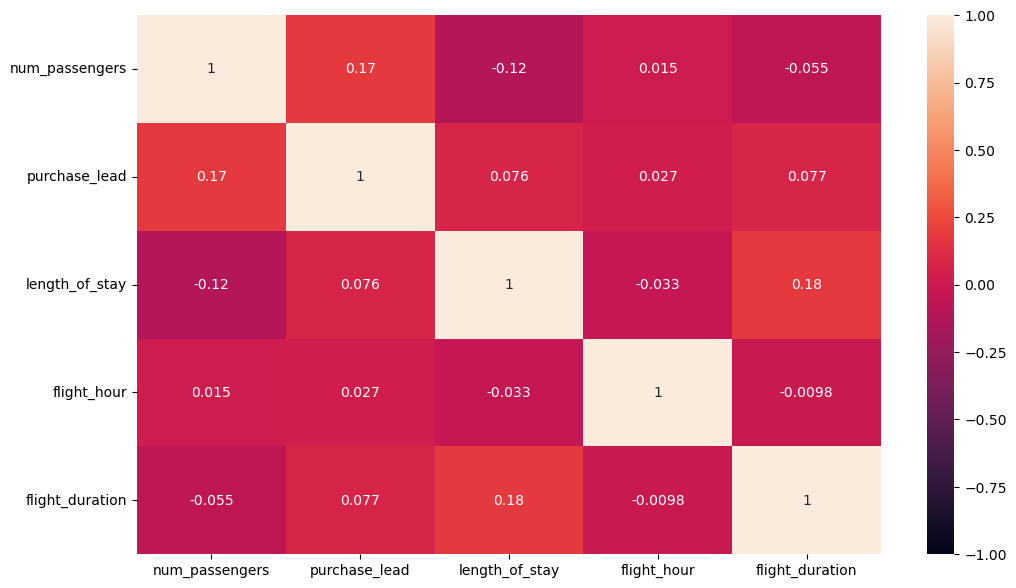

In [95]:
plt.figure(figsize=(12, 7))
sns.heatmap(df[nums].corr(), annot=True, vmin=-1, vmax=1)
plt.show()

# Observation from EDA

# Feature Engineering 

In [96]:
df = df.drop(["route", "booking_origin"], axis=1)

In [97]:
# split data set
X = data.drop("booking_complete", axis=1)
y = data["booking_complete"]

In [99]:
# balance the imbalanced data set
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 30853), (1, 30853)]


In [ ]:
# # encode categorical features
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder(handle_unknown="ignore",sparse_output=False).set_output(transform="pandas")

# ohe_df = ohe.fit_transform(X_resampled[["sales_channel","trip_type"]])

# data = pd.concat([df, ohe_df], axis=1).drop(columns=["sales_channel","trip_type"])
# data.head()

# Model building and Evaluation

In [122]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=42)
# pipe = Pipeline(StandardScaler(), LogisticRegression())
# pipe.fit(X_train, y_train)  # apply scaling on training data
# Pipeline(steps=[('standardscaler', StandardScaler()),
#                 ('logisticregression', LogisticRegression())])

# pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

In [125]:
# Building model 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [157]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,test_size=0.25,random_state=42)

In [158]:
classifiers = [
    ('svc', SVC()),('Logit', LogisticRegression()),('Gauss', GaussianNB()),('knc', KNeighborsClassifier()),
    ('rfc', RandomForestClassifier()),('dtc', DecisionTreeClassifier()),('sgd', SGDClassifier(random_state=42))
]

In [159]:
for id, model in enumerate(classifiers): 
    pipe = Pipeline([('scaler', StandardScaler()), model])
    score = pipe.fit(X_train, y_train).score(X_test, y_test)
    print(f"{classifiers[id][0]} -->{score}")

svc -->0.6380372074933558
Logit -->0.6119141764438971
Gauss -->0.5320541907046088
knc -->0.769170934076619
rfc -->0.9570234005315357
dtc -->0.9088610877033771
sgd -->0.6054320347442795


In [ ]:
# confusion_matrix(y_true, y_pred)

In [ ]:
# tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
# (tn, fp, fn, tp)

In [162]:
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()

In [164]:
def diisplay(model):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, predictions, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    
    plt.show()

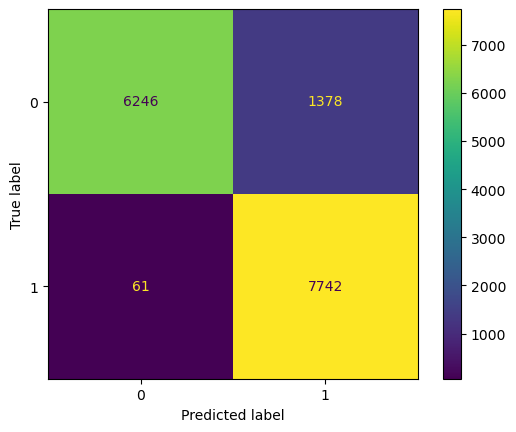

In [165]:
diisplay(dtc)

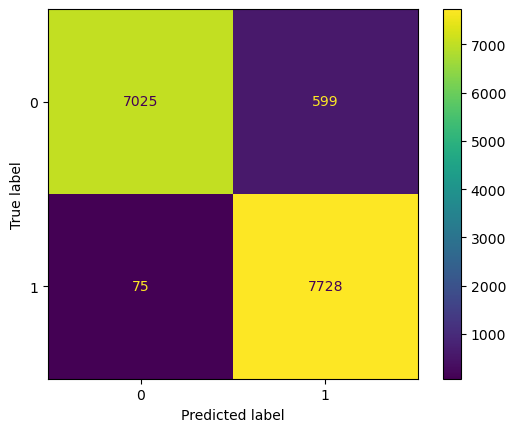

In [166]:
diisplay(rfc)

In [167]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [168]:
y_pred = rfc.predict(X_test)

In [170]:

# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(10, 7))
# sns.heatmap(cm, annot=True)


In [171]:
r2 = rfc.score(X_train, y_train)

In [172]:
print(f"Score: {r2*100:.2f} %")

Score: 99.97 %


In [174]:
acc_sc = accuracy_score(y_test, y_pred)

In [175]:
acc_sc*100

95.63751863615738

In [176]:
re_sc = recall_score(y_test, y_pred)

In [177]:
re_sc

0.9910290913751121

In [178]:
pre_sc = precision_score(y_test, y_pred)

In [179]:
pre_sc

0.9276631477927063

In [184]:
roc_auc_score(y_test, y_pred)

0.9559683756980492

In [185]:
from sklearn.metrics import f1_score

In [186]:
f1_score(y_test, y_pred)

0.9582997707416816

In [180]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(7021, 603, 70, 7733)

# Conclusion after model building

In [181]:
import joblib

In [182]:
#joblib.dump(rfc, "booking_completion_prediction.joblib")

['booking_completion_prediction.joblib']

In conclusion, the binary classification project successfully demonstrated the ability to distinguish between two classes () with high accuracy of 95.63%. The model was trained and tested on a fairly large dataset, and the results indicate a strong predictive performance. Key metrics such as precision (92.76%), recall (99.1%), roc_auc (95.59%) and the F1-score (95.83) were utilized to evaluate the model, ensuring a comprehensive assessment of its classification capabilities. Future work could explore the integration of additional features, the application of more complex algorithms, or the deployment of the model in a real-world environment to further enhance its utility and effectiveness. This project underscores the potential of machine learning in binary classification tasks and sets the stage for more advanced applications in the field.